## What movie should I watch?


In [1]:
import random
import pandas
import matplotlib.pyplot as plt
import numpy as np

## this will optimize our math
from scipy.sparse import csr_matrix as sparse_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD

import os

In [2]:
## see the movie Lens dataset - described in the readme file
ratings = pandas.read_csv("ratings.csv")

print("ratings shape: ", ratings.shape)
ratings.head()

ratings shape:  (100004, 4)


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [3]:
ratings.describe()
#movie_info.query("movieId ==1172")

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [4]:
## the 2nd dataset - the movies with ID and genre
movie_info = pandas.read_csv("movies.csv")

print("movie_info shape: ", movie_info.shape)
movie_info.head()

movie_info shape:  (9125, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
## links gives us the IMDB ID and the movie database ID as a key
links  = pandas.read_csv("data/links.csv")

print("links shape: ", links.shape)
links.head()

links shape:  (9125, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
## describe the dataset:

## def get_stats(ratings, item_key="item", user_key="user"):
print("Number of ratings:", len(ratings))
print("The average rating:", np.mean(ratings["rating"]))
print("The median rating:", np.median(ratings["rating"]))
print("The minimum rating:", min(ratings["rating"]))
print("The maximum rating:", max(ratings["rating"]))

n = len(set(ratings["movieId"]))
d = len(set(ratings["userId"]))
print("Number of users:", d)
print("Number of movies:", n)
print("Fraction nonzero:", len(ratings)/(n*d))
   
# size
print("Size of full X matrix (GB):", (n*d)*8/1e9)




Number of ratings: 100004
The average rating: 3.543608255669773
The median rating: 4.0
The minimum rating: 0.5
The maximum rating: 5.0
Number of users: 671
Number of movies: 9066
Fraction nonzero: 0.016439141608663475
Size of full X matrix (GB): 0.048666288


In [7]:
## this just goes from a matrix to a dictionary, and gives us some attributes we can call.
def create_X(ratings,n,d,user_key="user",item_key="item"):
    user_mapper = dict(zip(np.unique(ratings[user_key]), list(range(d))))
    item_mapper = dict(zip(np.unique(ratings[item_key]), list(range(n))))

    user_inverse_mapper = dict(zip(list(range(d)), np.unique(ratings[user_key])))
    item_inverse_mapper = dict(zip(list(range(n)), np.unique(ratings[item_key])))

    user_ind = [user_mapper[i] for i in ratings[user_key]]
    item_ind = [item_mapper[i] for i in ratings[item_key]]

    X = sparse_matrix((ratings["rating"], (item_ind, user_ind)), shape=(n,d))
    
    return X, user_mapper, item_mapper, user_inverse_mapper, item_inverse_mapper, user_ind, item_ind

In [8]:
X, user_mapper, item_mapper, user_inverse_mapper, item_inverse_mapper, user_ind, item_ind = create_X(ratings, n, d, user_key="userId", item_key="movieId")



In [9]:
## Lets inspect:
print("X shape: ",X.shape, " and nonzero elements: ", X.nnz)
print("And the file size in bytes:", X.data.nbytes)

X shape:  (9066, 671)  and nonzero elements:  100004
And the file size in bytes: 800032


In [10]:
## Lets look at Toy Story:
toy_story_ind = 0
toy_story_vec = X[toy_story_ind]

print("our fancy new toy story: ", toy_story_vec)

our fancy new toy story:    (0, 6)	3.0
  (0, 8)	4.0
  (0, 12)	5.0
  (0, 14)	2.0
  (0, 18)	3.0
  (0, 19)	3.5
  (0, 22)	3.0
  (0, 25)	5.0
  (0, 29)	4.0
  (0, 36)	4.0
  (0, 42)	4.0
  (0, 43)	4.0
  (0, 46)	5.0
  (0, 47)	4.0
  (0, 54)	3.0
  (0, 55)	4.0
  (0, 62)	5.0
  (0, 66)	3.0
  (0, 67)	4.0
  (0, 68)	5.0
  (0, 69)	5.0
  (0, 71)	3.5
  (0, 72)	5.0
  (0, 74)	3.0
  (0, 76)	4.0
  :	:
  (0, 593)	4.0
  (0, 594)	5.0
  (0, 595)	3.5
  (0, 596)	5.0
  (0, 597)	4.5
  (0, 602)	4.0
  (0, 606)	4.5
  (0, 607)	4.0
  (0, 614)	4.0
  (0, 615)	4.0
  (0, 622)	4.5
  (0, 623)	5.0
  (0, 629)	4.0
  (0, 635)	3.0
  (0, 640)	4.0
  (0, 645)	5.0
  (0, 646)	4.0
  (0, 648)	4.0
  (0, 652)	4.0
  (0, 653)	5.0
  (0, 659)	2.5
  (0, 662)	4.0
  (0, 663)	3.5
  (0, 669)	4.0
  (0, 670)	5.0


In [11]:
## remember toy story had movieId = 1
ratings.query("movieId==1").describe()

,userId,movieId,rating,timestamp
count,247.000000,247.0,247.000000,2.470000e+02
mean,338.558704,1.0,3.872470,1.103116e+09
std,189.961452,0.0,0.958981,2.145215e+08
min,7.000000,1.0,1.000000,8.282124e+08
25%,164.500000,1.0,3.000000,9.053295e+08
50%,353.000000,1.0,4.000000,1.079098e+09
75%,500.500000,1.0,5.000000,1.287368e+09
max,671.000000,1.0,5.000000,1.475784e+09


In [12]:
### To return the correct movie, some helper functions
def movie_name (index):
    name =movie_info.loc[index,]['title']
    return(name)


def movie_name_id (mid):
    name = movie_info[movie_info['movieId']==mid]['title']
    return(name)

## need this later:
def find_nearestneighbour(model, X, query_ind):
    nbs = model.kneighbors(X[query_ind], return_distance = False)
    return(nbs)


Most reviews: 321    Forrest Gump (1994)
Name: title, dtype: object
Most stars: 284    Shawshank Redemption, The (1994)
Name: title, dtype: object
Lowest average: 1062    Santa with Muscles (1996)
Name: title, dtype: object


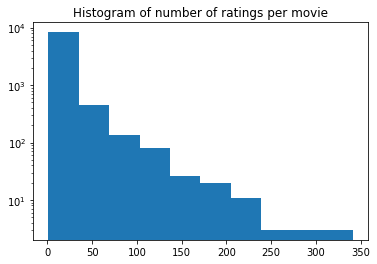

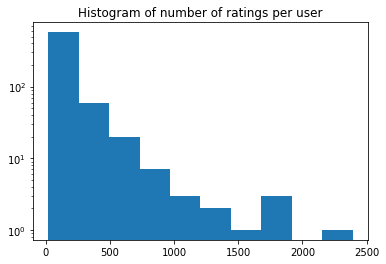

In [13]:
## movie with the most reviews
rev = ratings.movieId.value_counts().idxmax()
print("Most reviews:", movie_name_id(rev))
   
## movie with the most stars
star = ratings.groupby('movieId').rating.sum().idxmax()
print("Most stars:", movie_name_id(star))

## item with the lowest average
low = ratings.groupby('movieId').rating.mean().idxmin()
print("Lowest average:", movie_name_id(low))

## Histograms

## Movie ratings
A = ratings.movieId.value_counts()
plt.hist(A, bins=10)  # arguments are passed to np.histogram
plt.title("Histogram of number of ratings per movie")
plt.yscale('log', nonposy='clip')
plt.show()

## user ratings
A = ratings.userId.value_counts()
#np.histogram(A)
plt.hist(A, bins=10)  # arguments are passed to np.histogram
plt.title("Histogram of number of ratings per user")
plt.yscale('log', nonposy='clip')
plt.show()

In [14]:
## Explore some distances using KNN

## fit the k neighbours model
model = NearestNeighbors(n_neighbors=5)
model.fit(X)

## find the neighbours for Toy Story
nbrs_e =find_nearestneighbour(model, X, 0)

##return movie name
print("by Euclidean distance, the 5 most similar movies to Toy Story are:")
for i in range(5):
    index = nbrs_e[0][i]
    print(movie_name(index))
    
## Try another distance metric
## Cosine distance
model = NearestNeighbors(n_neighbors=5, metric ='cosine')
model.fit(X)

nbrs_c = find_nearestneighbour(model, X, 0)

## separation line
print("")

##return movie name
print("by Cosine distance, the 5 most similar movies to Toy Story are:")
for i in range(5):
    index = nbrs_c[0][i]
    print(movie_name(index))

by Euclidean distance, the 5 most similar movies to Toy Story are:
Toy Story (1995)
Toy Story 2 (1999)
Bug's Life, A (1998)
Groundhog Day (1993)
Independence Day (a.k.a. ID4) (1996)

by Cosine distance, the 5 most similar movies to Toy Story are:
Toy Story (1995)
Toy Story 2 (1999)
Star Wars: Episode IV - A New Hope (1977)
Forrest Gump (1994)
Independence Day (a.k.a. ID4) (1996)


In [15]:
## total rankings of those moveis? what's better?
euclid = list(range(5))
sum = 0
for i in range(5):
    euclid[i]=nbrs_e[0][i]
    sum = sum+ratings[ratings['movieId']==euclid[i]].rating.sum()

print("Total stars, Euclidean distance:", sum)

cosine = list(range(5))
sum = 0
for i in range(5):
    cosine[i]=nbrs_c[0][i]
    sum = sum+ ratings[ratings['movieId']==cosine[i]].rating.sum()

print("Total stars, Cosine distance:", sum)

Total stars, Euclidean distance: 164.5
Total stars, Cosine distance: 137.5


## SVD - Singular Value Decomposition

In [22]:
# what does SVD do?

A = np.matrix([[1, 2,0,3,4], [4, 5,1,5,6], [3, 6,1,0,5]])
## A is 3 rows, and 5 columns

amy = TruncatedSVD(n_components=3) ## want 3 columns

B =amy.fit_transform(A)  
C = amy.components_

## multiply B and C:
D = np.dot(B,C) ## multiplying matrices

print("A: ",A, A.shape)
print("B: ",B, B.shape)
print("C: ",C, C.shape)
print("D: ",D, D.shape)

print("show that A is approximately D:")
(D-A).round(5)

A:  [[1 2 0 3 4]
 [4 5 1 5 6]
 [3 6 1 0 5]] (3, 5)
B:  [[ 5.11128188 -1.65483099  1.06598873]
 [ 9.99655069 -1.60432548 -0.70364338]
 [ 7.81954547  3.13266656  0.2027532 ]] (3, 3)
C:  [[ 0.36621562  0.57223141  0.09517068  0.34891062  0.63846789]
 [ 0.08765525  0.49350434  0.10104116 -0.85853393 -0.03847328]
 [-0.68178643 -0.10147365 -0.29947609 -0.19147398  0.6312861 ]] (3, 5)
D:  [[ 1.00000000e+00  2.00000000e+00 -3.88578059e-16  3.00000000e+00
   4.00000000e+00]
 [ 4.00000000e+00  5.00000000e+00  1.00000000e+00  5.00000000e+00
   6.00000000e+00]
 [ 3.00000000e+00  6.00000000e+00  1.00000000e+00 -2.49800181e-16
   5.00000000e+00]] (3, 5)
show that A is approximately D:


C:\Users\Amy\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


array([[ 0., -0., -0., -0., -0.],
       [-0.,  0.,  0., -0.,  0.],
       [-0., -0., -0., -0.,  0.]])

In [17]:
## using the base parameters of the SVD algorithm, will reduce our large space to only 10 dimensions
tsvd = TruncatedSVD(n_components=10)
Z =tsvd.fit_transform(X)
W = tsvd.components_

In [18]:
## Let's look at Z a bit more closely:

print("X had shape ", X.shape)
print("But Z has shape ", Z.shape)
print("And W has shape ",W.shape )





X had shape  (9066, 671)
But Z has shape  (9066, 10)
And W has shape  (10, 671)


In [19]:
##So:
A =np.dot(Z,W)

## has the same dimensions of X, but ist=

In [20]:
B=tsvd.inverse_transform(Z)

B==A

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [21]:
## Tehn, lets fit Nearest Neighbours on Z
model = NearestNeighbors(n_neighbors =5)
model.fit(Z)

##find the 5 nearest neighbours, 
nbs = model.kneighbors(Z[0].reshape(1,-1),return_distance = False )


##return movies
for i in range(5):
    index = nbs[0][i]
    print(movie_name(index))

Toy Story (1995)
Groundhog Day (1993)
Lion King, The (1994)
Men in Black (a.k.a. MIB) (1997)
Independence Day (a.k.a. ID4) (1996)
